In [129]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno

In [130]:
prop16 = pd.read_csv("properties_2016.csv")
train16= pd.read_csv("train_2016_v2.csv")
prop17 = pd.read_csv("properties_2017.csv")
submission = pd.read_csv("sample_submission.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [131]:
submission.shape

(2985217, 7)

In [132]:
train16.shape

(90275, 3)

In [133]:
prop16.shape

(2985217, 58)

In [134]:
prop16.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [135]:
prop17.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,4.0,NaN,NaN,...,1.0,NaN,179072.0,287634.0,2016.0,108562.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,404013.0,563029.0,2016.0,159016.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,103553.0,698984.0,2016.0,595431.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,4.0,NaN,NaN,...,1.0,NaN,221771.0,265184.0,2016.0,43413.0,4054.76,NaN,NaN,NaN


## prop16, prop17 동일 parcelid 비교

In [136]:
df = pd.DataFrame(columns=["2016_parcelid","2017_parcelid"])
df

,2016_parcelid,2017_parcelid


In [137]:
df["2016_parcelid"],df["2017_parcelid"] = prop16["parcelid"], prop17["parcelid"]
df["same parcelid"] = df[df["2016_parcelid"]==df["2017_parcelid"]]["2016_parcelid"]
df

,2016_parcelid,2017_parcelid,same parcelid
0,10754147,10754147,10754147.0
1,10759547,10759547,10759547.0
2,10843547,10843547,10843547.0
3,10859147,10859147,10859147.0
4,10879947,10879947,10879947.0
5,10898347,10898347,10898347.0
6,10933547,10933547,10933547.0
7,10940747,10940747,10940747.0
8,10954547,10954547,10954547.0
9,10976347,10976347,10976347.0


In [138]:
df.head(15)

,2016_parcelid,2017_parcelid,same parcelid
0,10754147,10754147,10754147.0
1,10759547,10759547,10759547.0
2,10843547,10843547,10843547.0
3,10859147,10859147,10859147.0
4,10879947,10879947,10879947.0
5,10898347,10898347,10898347.0
6,10933547,10933547,10933547.0
7,10940747,10940747,10940747.0
8,10954547,10954547,10954547.0
9,10976347,10976347,10976347.0


In [139]:
%whos

Variable                 Type         Data/Info
-----------------------------------------------
df                       DataFrame             2016_parcelid  2<...>2985217 rows x 3 columns]
list_16_parcelid         list         n=2985217
list_16_train            list         n=90275
list_16_train_parcelid   list         n=90275
list_17_parcelid         list         n=2985217
list_prop16_parcelid     list         n=2985217
list_train16_parcelid    list         n=90275
merged                   DataFrame              parcelid  loger<...>985342 rows x 60 columns]
merged_t                 DataFrame                             <...>6.0373e+13  6.05904e+13  
missingValueColumns      list         n=59
msno                     module       <module 'missingno' from <...>s/missingno/__init__.py'>
np                       module       <module 'numpy' from '/Li<...>kages/numpy/__init__.py'>
pd                       module       <module 'pandas' from '/L<...>ages/pandas/__init__.py'>
plt            

In [140]:
list_16_parcelid = df["2016_parcelid"].tolist()
list_17_parcelid = df["2017_parcelid"].tolist()

In [141]:
list_17_parcelid[:20]

[10754147,
 10759547,
 10843547,
 10859147,
 10879947,
 10898347,
 10933547,
 10940747,
 10954547,
 10976347,
 11070347,
 11073947,
 11114347,
 11116947,
 11142747,
 11193347,
 11215747,
 11229347,
 11287347,
 11288547]

In [142]:
len([i for i in list_16_parcelid[:1000] if i in list_17_parcelid[:3000]])

993

In [143]:
df[df["2016_parcelid"]==df["2017_parcelid"]]

,2016_parcelid,2017_parcelid,same parcelid
0,10754147,10754147,10754147.0
1,10759547,10759547,10759547.0
2,10843547,10843547,10843547.0
3,10859147,10859147,10859147.0
4,10879947,10879947,10879947.0
5,10898347,10898347,10898347.0
6,10933547,10933547,10933547.0
7,10940747,10940747,10940747.0
8,10954547,10954547,10954547.0
9,10976347,10976347,10976347.0


In [144]:
prop17["parcelid"]

0          10754147
1          10759547
2          10843547
3          10859147
4          10879947
5          10898347
6          10933547
7          10940747
8          10954547
9          10976347
10         11070347
11         11073947
12         11114347
13         11116947
14         11142747
15         11193347
16         11215747
17         11229347
18         11287347
19         11288547
20         11324547
21         11391347
22         11395747
23         11404347
24         11405747
25         11417147
26         11441547
27         11457547
28         11488147
29         11520747
30         11524947
31         11544747
32         11579347
33         11585547
34         11588747
35         11592147
36         11609547
37         11617547
38         11660547
39         11681747
40         11698747
41         11704347
42         11732547
43         11742147
44         11751547
45         11759947
46         11780147
47         11781947
48         11808747
49         11817747


# train_2016

## error

### outlier 탐색

In [145]:
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [146]:
range(train16.shape[0])

range(0, 90275)

In [147]:
np.sort(train16.logerror.values)

array([-4.605, -4.605, -4.51 , ...,  4.445,  4.52 ,  4.737])

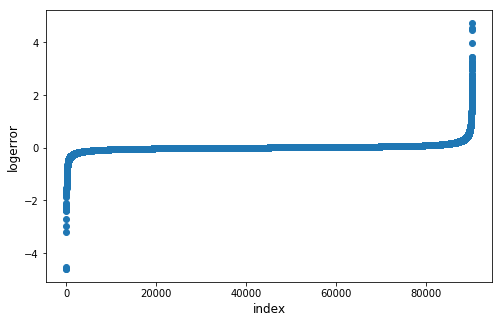

In [148]:
plt.figure(figsize=(8,5))
plt.scatter(range(train16.shape[0]), np.sort(train16.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [149]:
np.percentile(train16.logerror.values, 99)

0.4638819999999963

## transaction date

In [150]:
train16['transactiondate'] = pd.to_datetime(train16['transactiondate'])

In [151]:
train16['transaction_month'] = train16['transactiondate'].dt.month

In [152]:
train16.tail()

,parcelid,logerror,transactiondate,transaction_month
90270,10774160,-0.0356,2016-12-30,12
90271,12046695,0.0070,2016-12-30,12
90272,12995401,-0.2679,2016-12-30,12
90273,11402105,0.0602,2016-12-30,12
90274,12566293,0.4207,2016-12-30,12


In [153]:
np.sort(train16['transaction_month'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [154]:
train16['transaction_month'].value_counts()

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transaction_month, dtype: int64

In [155]:
transaction_month = train16['transaction_month'].value_counts()

### month마다 transaction 수

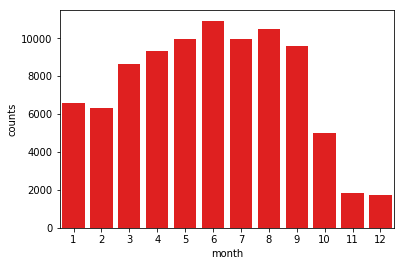

In [156]:
sns.barplot(transaction_month.index, transaction_month.values, color='red')
plt.xlabel('month')
plt.ylabel('counts')
plt.show()

### unique 하지 않은 parcelid

In [157]:
len(train16['parcelid'])

90275

In [158]:
train16['parcelid'].value_counts().head()

11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
Name: parcelid, dtype: int64

In [159]:
train16['parcelid'].value_counts().reset_index().head()

,index,parcelid
0,11842707,3
1,12613442,2
2,12032773,2
3,11729067,2
4,11845988,2


In [160]:
train16['parcelid'].value_counts().reset_index()\
['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

## prop16, prop17 merge Data

In [161]:
prop16_pid_list = prop16['parcelid'].tolist()
prop17_pid_list = prop17['parcelid'].tolist()

In [162]:
merged = pd.merge(prop16.head(10),prop17.head(10),on='parcelid',how="outer")

In [163]:
merged.shape

(10, 115)

In [164]:
merged

,parcelid,airconditioningtypeid_x,architecturalstyletypeid_x,basementsqft_x,bathroomcnt_x,bedroomcnt_x,buildingclasstypeid_x,buildingqualitytypeid_x,calculatedbathnbr_x,decktypeid_x,...,numberofstories_y,fireplaceflag_y,structuretaxvaluedollarcnt_y,taxvaluedollarcnt_y,assessmentyear_y,landtaxvaluedollarcnt_y,taxamount_y,taxdelinquencyflag_y,taxdelinquencyyear_y,censustractandblock_y
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,179072.0,287634.0,2016.0,108562.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,404013.0,563029.0,2016.0,159016.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,103553.0,698984.0,2016.0,595431.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,221771.0,265184.0,2016.0,43413.0,4054.76,NaN,NaN,NaN


In [165]:
merged.transpose()

,0,1,2,3,4,5,6,7,8,9
parcelid,10754147,10759547,10843547,10859147,10879947,10898347,10933547,10940747,10954547,10976347
airconditioningtypeid_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt_x,0,0,0,0,0,0,0,0,0,0
bedroomcnt_x,0,0,0,0,0,0,0,0,0,0
buildingclasstypeid_x,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,3
buildingqualitytypeid_x,NaN,NaN,NaN,7,NaN,7,NaN,NaN,NaN,7
calculatedbathnbr_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
decktypeid_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
merged = pd.merge(prop16.head(10),prop17.head(10),how="outer")

In [167]:
merged.shape

(19, 58)

In [168]:
merged

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [169]:
merged.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
parcelid,10754147,10759547,10843547,10859147,10879947,10898347,10933547,10940747,10954547,10976347,10754147,10843547,10859147,10879947,10898347,10933547,10940747,10954547,10976347
airconditioningtypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathroomcnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
bedroomcnt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
buildingclasstypeid,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,3,NaN,5,3,4,4,NaN,NaN,NaN,3
buildingqualitytypeid,NaN,NaN,NaN,7,NaN,7,NaN,NaN,NaN,7,NaN,NaN,6,NaN,4,NaN,NaN,NaN,4
calculatedbathnbr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
decktypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
merged['parcelid'].value_counts()

10940747    2
10898347    2
10954547    2
10976347    2
10879947    2
10859147    2
10933547    2
10843547    2
10754147    2
10759547    1
Name: parcelid, dtype: int64

# properties 2016

## Missing Value

In [171]:
list_train16_parcelid= train16['parcelid'].tolist()
list_prop16_parcelid= prop16['parcelid'].tolist()

In [172]:
len(list_train16_parcelid)

90275

In [173]:
list_train16_parcelid[:10]

[11016594,
 14366692,
 12098116,
 12643413,
 14432541,
 11509835,
 12286022,
 17177301,
 14739064,
 14677559]

In [174]:
len(list_prop16_parcelid)

2985217

In [175]:
list_prop16_parcelid

[10754147,
 10759547,
 10843547,
 10859147,
 10879947,
 10898347,
 10933547,
 10940747,
 10954547,
 10976347,
 11073947,
 11114347,
 11116947,
 11142747,
 11193347,
 11215747,
 11229347,
 11287347,
 11288547,
 11324547,
 11391347,
 11395747,
 11404347,
 11405747,
 11417147,
 11457547,
 11488147,
 11520747,
 11524947,
 11544747,
 11579347,
 11585547,
 11588747,
 11592147,
 11609547,
 11617547,
 11660547,
 11681747,
 11698747,
 11704347,
 11732547,
 11742147,
 11751547,
 11759947,
 11780147,
 11780347,
 11781947,
 11808747,
 11817747,
 11818747,
 11823747,
 11824947,
 11825347,
 11828947,
 11829547,
 11852147,
 11900147,
 11918747,
 11935747,
 11936547,
 11951747,
 11954547,
 11960747,
 11978347,
 12013147,
 12022147,
 12037147,
 12060147,
 12076747,
 12077147,
 12104147,
 12111347,
 12144747,
 12167947,
 12168547,
 12171147,
 12188547,
 12195547,
 12209347,
 12211747,
 12228547,
 12254347,
 12257147,
 12310147,
 12311747,
 12322547,
 12360147,
 12366747,
 12371547,
 12378747,
 12405147,

In [176]:
len([i for i in list_train16_parcelid[:100] if i in list_prop16_parcelid])

100

In [177]:
merged = pd.merge(train16,prop16,on="parcelid",how="right")

In [178]:
merged.shape

(2985342, 61)

In [179]:
merged = pd.merge(train16,prop16,on="parcelid",how="left")

In [180]:
merged.shape

(90275, 61)

In [181]:
merged.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [182]:
merged = pd.merge(train16,prop16,on="parcelid",how="right")

In [183]:
merged.shape

(2985342, 61)

In [184]:
merged.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1.0,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1.0,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [185]:
merged_t = merged.head().transpose()

In [186]:
merged_t.head()

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
transaction_month,1,1,1,1,1
airconditioningtypeid,1,NaN,1,1,NaN


In [187]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
len(missingValueColumns), missingValueColumns

(60,
 ['logerror',
  'transactiondate',
  'transaction_month',
  'airconditioningtypeid',
  'architecturalstyletypeid',
  'basementsqft',
  'bathroomcnt',
  'bedroomcnt',
  'buildingclasstypeid',
  'buildingqualitytypeid',
  'calculatedbathnbr',
  'decktypeid',
  'finishedfloor1squarefeet',
  'calculatedfinishedsquarefeet',
  'finishedsquarefeet12',
  'finishedsquarefeet13',
  'finishedsquarefeet15',
  'finishedsquarefeet50',
  'finishedsquarefeet6',
  'fips',
  'fireplacecnt',
  'fullbathcnt',
  'garagecarcnt',
  'garagetotalsqft',
  'hashottuborspa',
  'heatingorsystemtypeid',
  'latitude',
  'longitude',
  'lotsizesquarefeet',
  'poolcnt',
  'poolsizesum',
  'pooltypeid10',
  'pooltypeid2',
  'pooltypeid7',
  'propertycountylandusecode',
  'propertylandusetypeid',
  'propertyzoningdesc',
  'rawcensustractandblock',
  'regionidcity',
  'regionidcounty',
  'regionidneighborhood',
  'regionidzip',
  'roomcnt',
  'storytypeid',
  'threequarterbathnbr',
  'typeconstructiontypeid',
  'uni

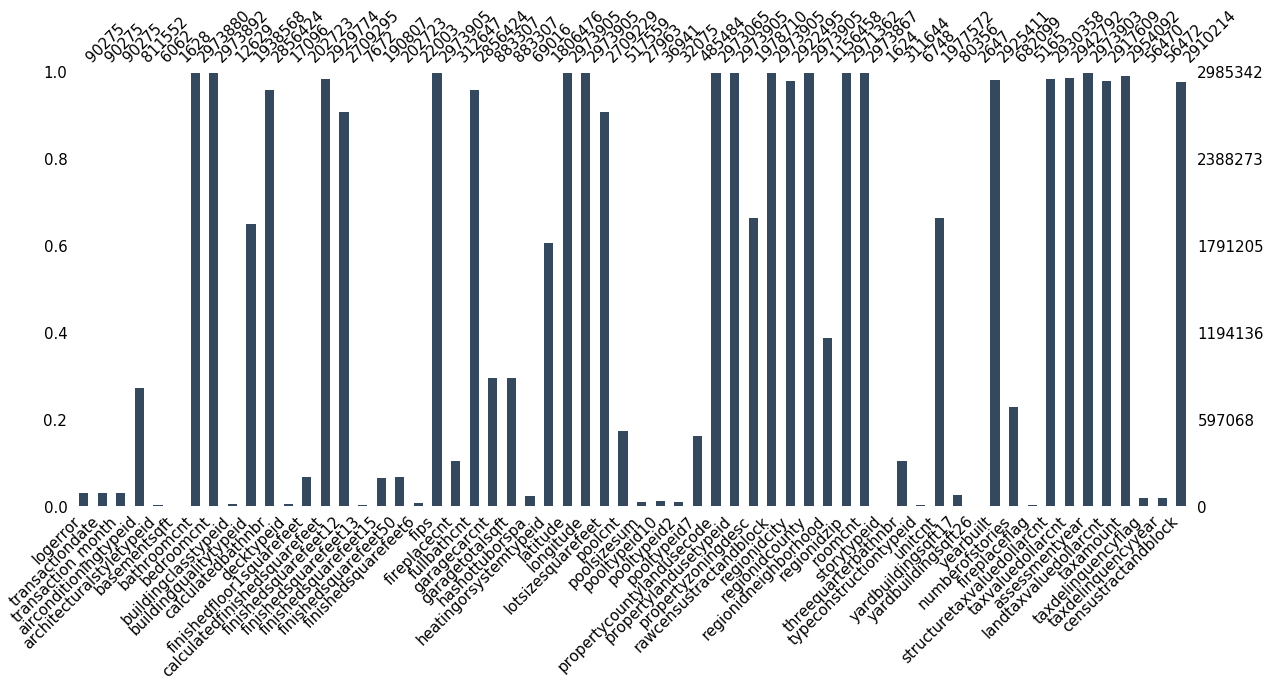

In [188]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=15,labels=True)

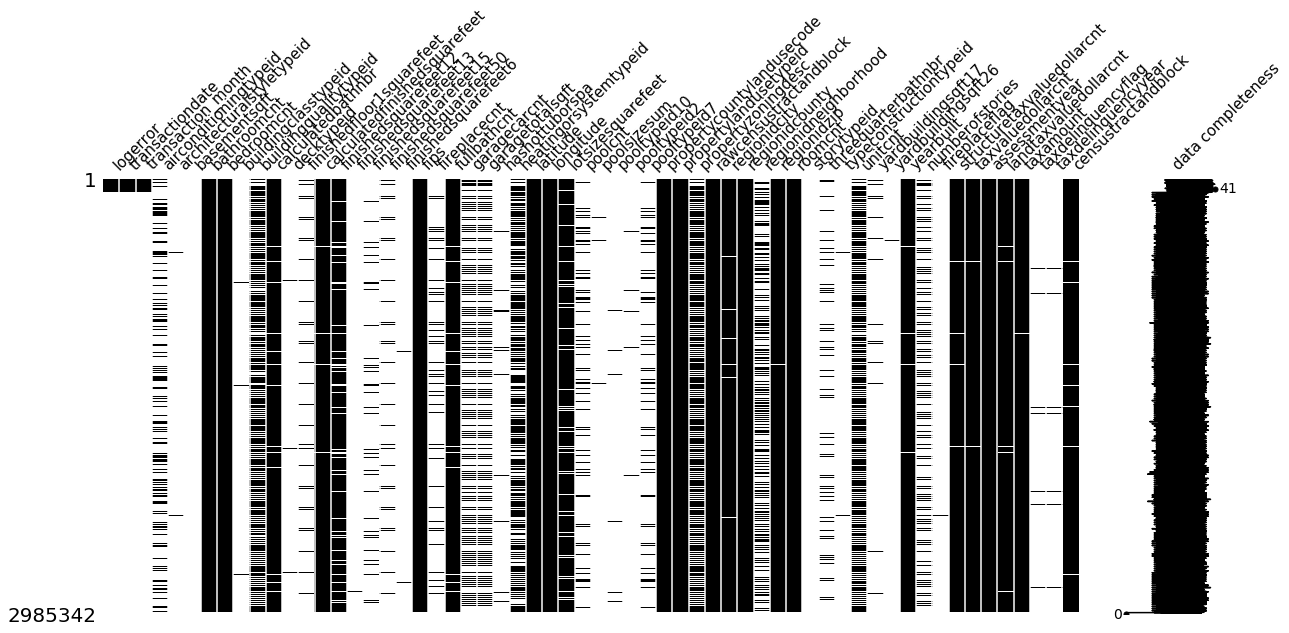

In [189]:
msno.matrix(merged[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=15,sparkline=True,labels=True)

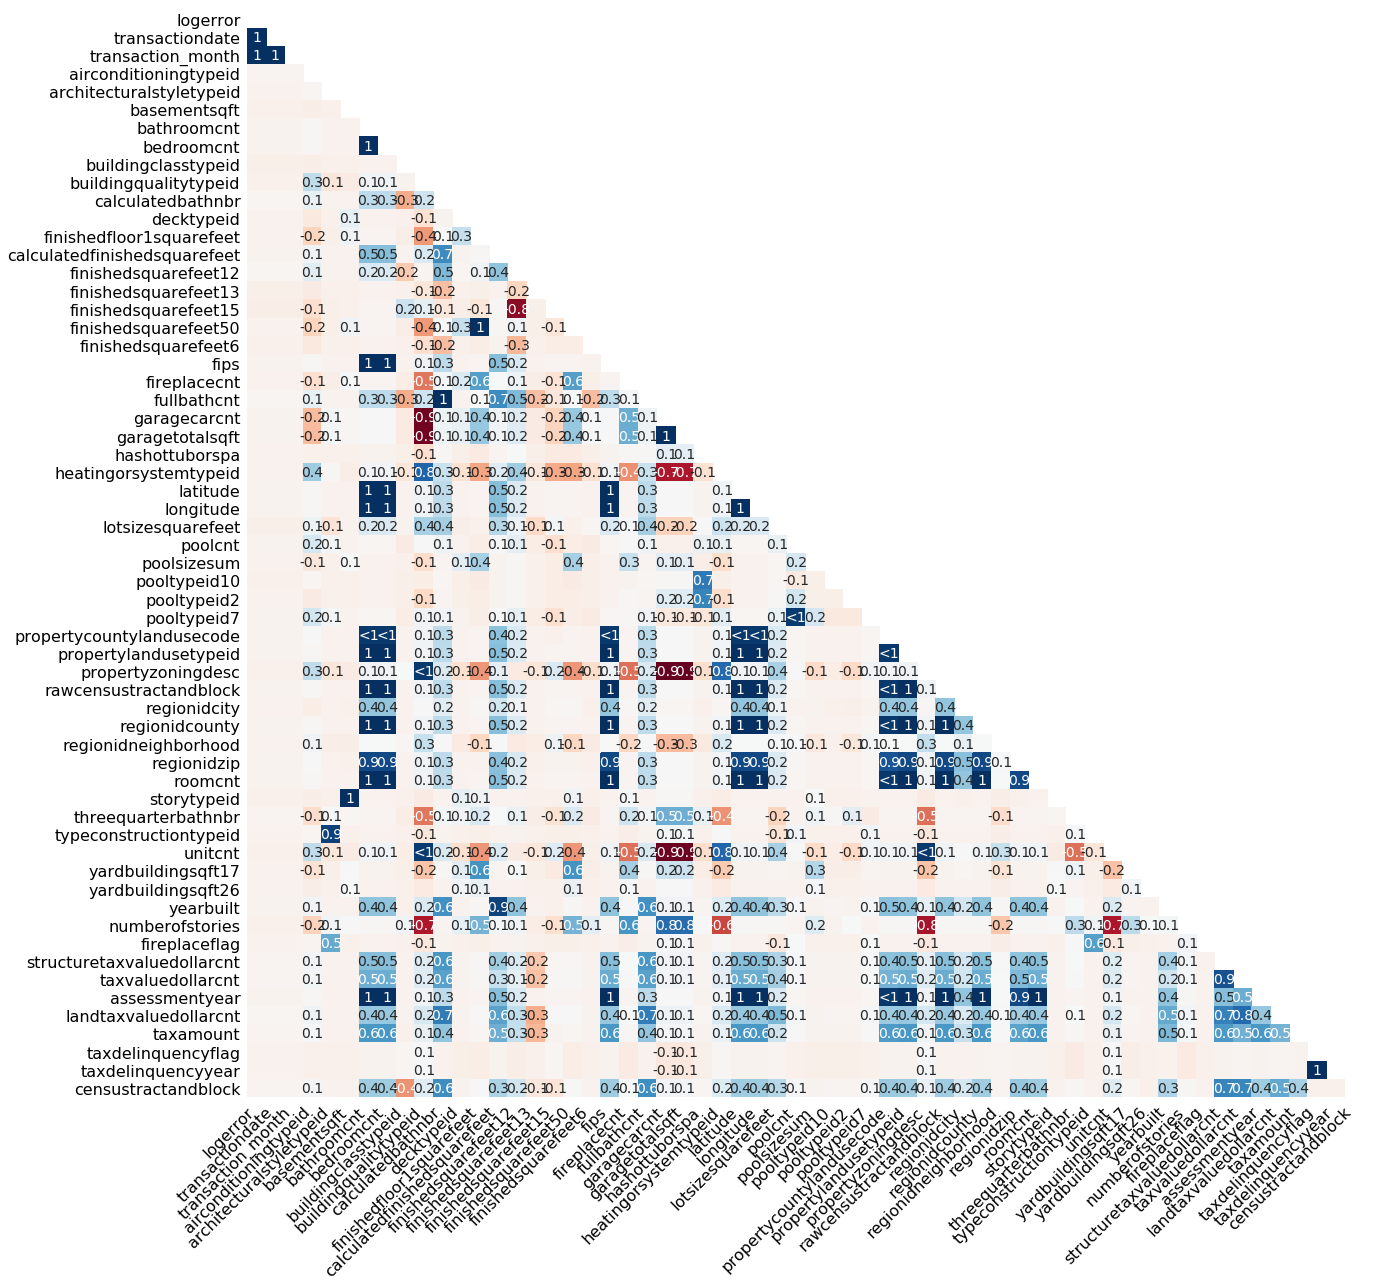

In [190]:
msno.heatmap(merged[missingValueColumns],figsize=(20,20))

In [191]:
merged_dtype = merged.dtypes.reset_index()

In [192]:
merged_dtype.head(8)

,index,0
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,float64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64


In [193]:
merged_dtype.columns=["column","column type"]

In [194]:
merged_dtype.groupby("column type").aggregate('count').reset_index()

,column type,column
0,int64,1
1,float64,54
2,datetime64[ns],1
3,object,5


In [195]:
merged_missing = merged.isnull().sum().reset_index()

In [196]:
merged_missing.head(8)

,index,0
0,parcelid,0
1,logerror,2895067
2,transactiondate,2895067
3,transaction_month,2895067
4,airconditioningtypeid,2173790
5,architecturalstyletypeid,2979280
6,basementsqft,2983714
7,bathroomcnt,11462


In [197]:
merged_missing.columns = ["columns","missing value counts"]

In [198]:
merged_missing.head(8)

,columns,missing value counts
0,parcelid,0
1,logerror,2895067
2,transactiondate,2895067
3,transaction_month,2895067
4,airconditioningtypeid,2173790
5,architecturalstyletypeid,2979280
6,basementsqft,2983714
7,bathroomcnt,11462


In [199]:
merged.shape[0]

2985342

In [200]:
merged_missing["missing ratio"] = \
merged_missing["missing value counts"]/merged.shape[0]

In [201]:
merged_missing.head(8)

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
1,logerror,2895067,0.969761
2,transactiondate,2895067,0.969761
3,transaction_month,2895067,0.969761
4,airconditioningtypeid,2173790,0.728154
5,architecturalstyletypeid,2979280,0.997969
6,basementsqft,2983714,0.999455
7,bathroomcnt,11462,0.003839


In [202]:
pd.options.display.max_rows = 115

In [203]:
merged_missing.head()

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
1,logerror,2895067,0.969761
2,transactiondate,2895067,0.969761
3,transaction_month,2895067,0.969761
4,airconditioningtypeid,2173790,0.728154


In [204]:
merged_missing[merged_missing["columns"]=='basementsqft']

,columns,missing value counts,missing ratio
6,basementsqft,2983714,0.999455


In [205]:
merged_missing[merged_missing["missing ratio"]<0.3]

,columns,missing value counts,missing ratio
0,parcelid,0,0.000000
7,bathroomcnt,11462,0.003839
8,bedroomcnt,11450,0.003835
11,calculatedbathnbr,128918,0.043184
14,calculatedfinishedsquarefeet,55568,0.018614
15,finishedsquarefeet12,276047,0.092467
20,fips,11437,0.003831
22,fullbathcnt,128918,0.043184
27,latitude,11437,0.003831
28,longitude,11437,0.003831


In [232]:
merged_missing[merged_missing["missing ratio"]<0.3]['columns'].count()

25

In [208]:
len(merged_missing[merged_missing["missing ratio"]>0.8])

27

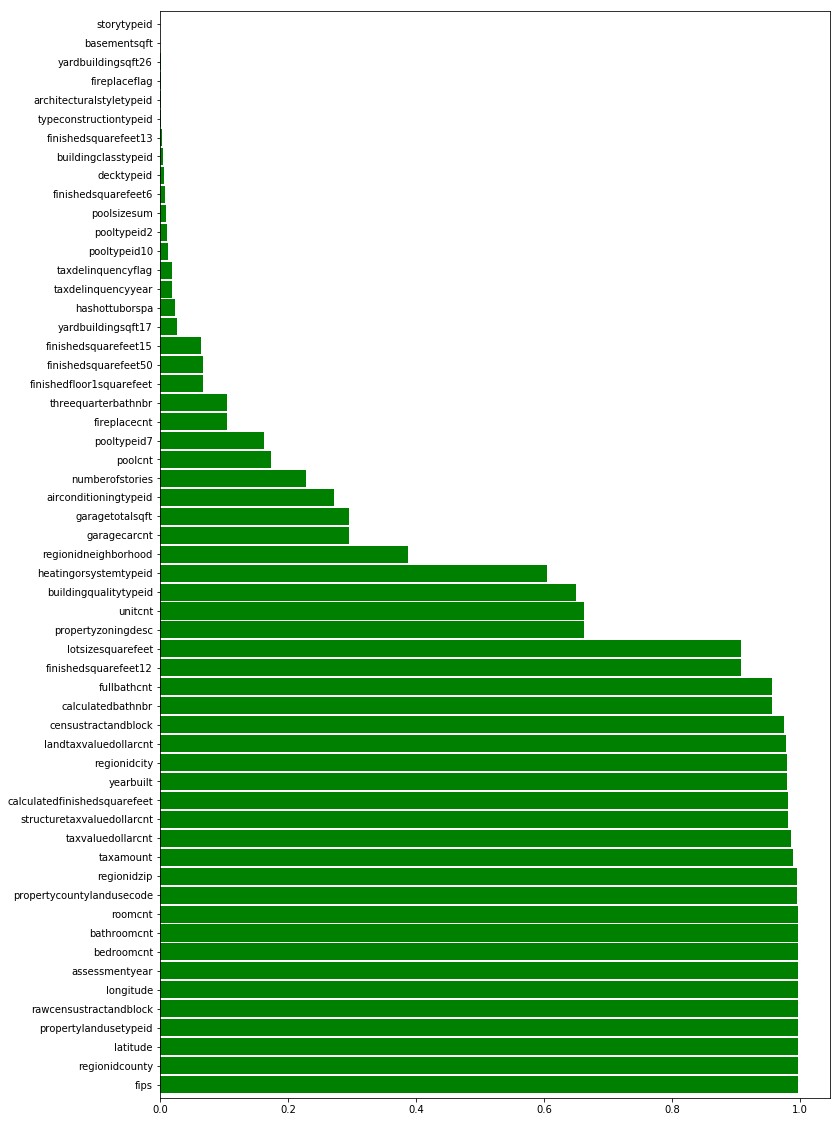

In [210]:
plt.figure(figsize=(12,20))
prop16.drop('parcelid',axis=1).notnull().mean()\
.sort_values(ascending = False).plot(kind = 'barh',color='green', width=0.9)

In [211]:
np.dtype(prop16['poolcnt'])

dtype('float64')

In [212]:
prop16['poolcnt'].describe().reset_index()

,index,poolcnt
0,count,517534.0
1,mean,1.0
2,std,0.0
3,min,1.0
4,25%,1.0
5,50%,1.0
6,75%,1.0
7,max,1.0


In [213]:
prop16['poolsizesum'].describe().reset_index()

,index,poolsizesum
0,count,27960.000000
1,mean,519.710980
2,std,191.323284
3,min,19.000000
4,25%,430.000000
5,50%,495.000000
6,75%,594.000000
7,max,17410.000000


In [214]:
prop16['numberofstories'].describe()

count    682069.000000
mean          1.401464
std           0.539076
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          41.000000
Name: numberofstories, dtype: float64

In [215]:
prop16['numberofstories'].unique()

array([ nan,   1.,   4.,   2.,   3.,  41.,   5.,   6.,  20.,   7.,  14.,
        17.,   8.])

In [216]:
prop16['garagecarcnt'].value_counts().reset_index().sort_values(by='index')

,index,garagecarcnt
3,0.0,14005
1,1.0,177579
0,2.0,660462
2,3.0,19634
4,4.0,8495
5,5.0,1705
6,6.0,575
7,7.0,266
8,8.0,181
9,9.0,127


In [217]:
prop16['garagecarcnt'].unique()

array([ nan,   2.,   4.,   1.,   3.,   0.,   5.,   7.,   6.,   8.,   9.,
        12.,  11.,  10.,  13.,  14.,  15.,  25.,  21.,  18.,  17.,  24.,
        19.,  16.,  20.])

In [218]:
prop16['garagecarcnt'].describe()

count    883267.000000
mean          1.823517
std           0.610035
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          25.000000
Name: garagecarcnt, dtype: float64

In [219]:
prop16['garagetotalsqft'].describe()

count    883267.000000
mean        383.769357
std         245.443419
min           0.000000
25%         324.000000
50%         441.000000
75%         494.000000
max        7749.000000
Name: garagetotalsqft, dtype: float64

In [220]:
prop16['garagetotalsqft'].unique()

array([   nan,   420.,   525., ...,  2482.,  4568.,  1974.])

In [221]:
prop16['heatingorsystemtypeid'].value_counts().reset_index().sort_values(by='index')

,index,heatingorsystemtypeid
7,1.0,262
0,2.0,1156830
2,6.0,27480
1,7.0,595453
9,10.0,39
11,11.0,16
10,12.0,25
5,13.0,1342
8,14.0,41
6,18.0,586


In [222]:
prop16['buildingqualitytypeid'].value_counts().reset_index().sort_values(by='index')

,index,buildingqualitytypeid
2,1.0,69467
11,2.0,2
10,3.0,6
1,4.0,692160
8,5.0,21
5,6.0,94
0,7.0,1133238
6,8.0,51
7,9.0,25
3,10.0,39713


In [223]:
prop16['buildingqualitytypeid'].describe()

count    1.938488e+06
mean     5.784787e+00
std      1.805352e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      7.000000e+00
max      1.200000e+01
Name: buildingqualitytypeid, dtype: float64

In [224]:
prop16['propertyzoningdesc'].value_counts().reset_index()

,index,propertyzoningdesc
0,LAR1,275029
1,LAR3,67105
2,LARS,54859
3,LBR1N,52750
4,LAR2,48808
5,LARD1.5,39895
6,SCUR2,30459
7,LARD2,30377
8,TORR-LO,26632
9,LARA,26103


In [225]:
prop16['unitcnt'].value_counts().reset_index().sort_values(by='index')

,index,unitcnt
0,1.0,1780051
1,2.0,115652
3,3.0,39830
2,4.0,39877
4,5.0,588
5,6.0,363
7,7.0,167
6,8.0,178
9,9.0,91
8,10.0,97


In [226]:
prop16['unitcnt'].describe()

count    1.977490e+06
mean     1.181171e+00
std      2.447896e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.970000e+02
Name: unitcnt, dtype: float64